Pregunta 1

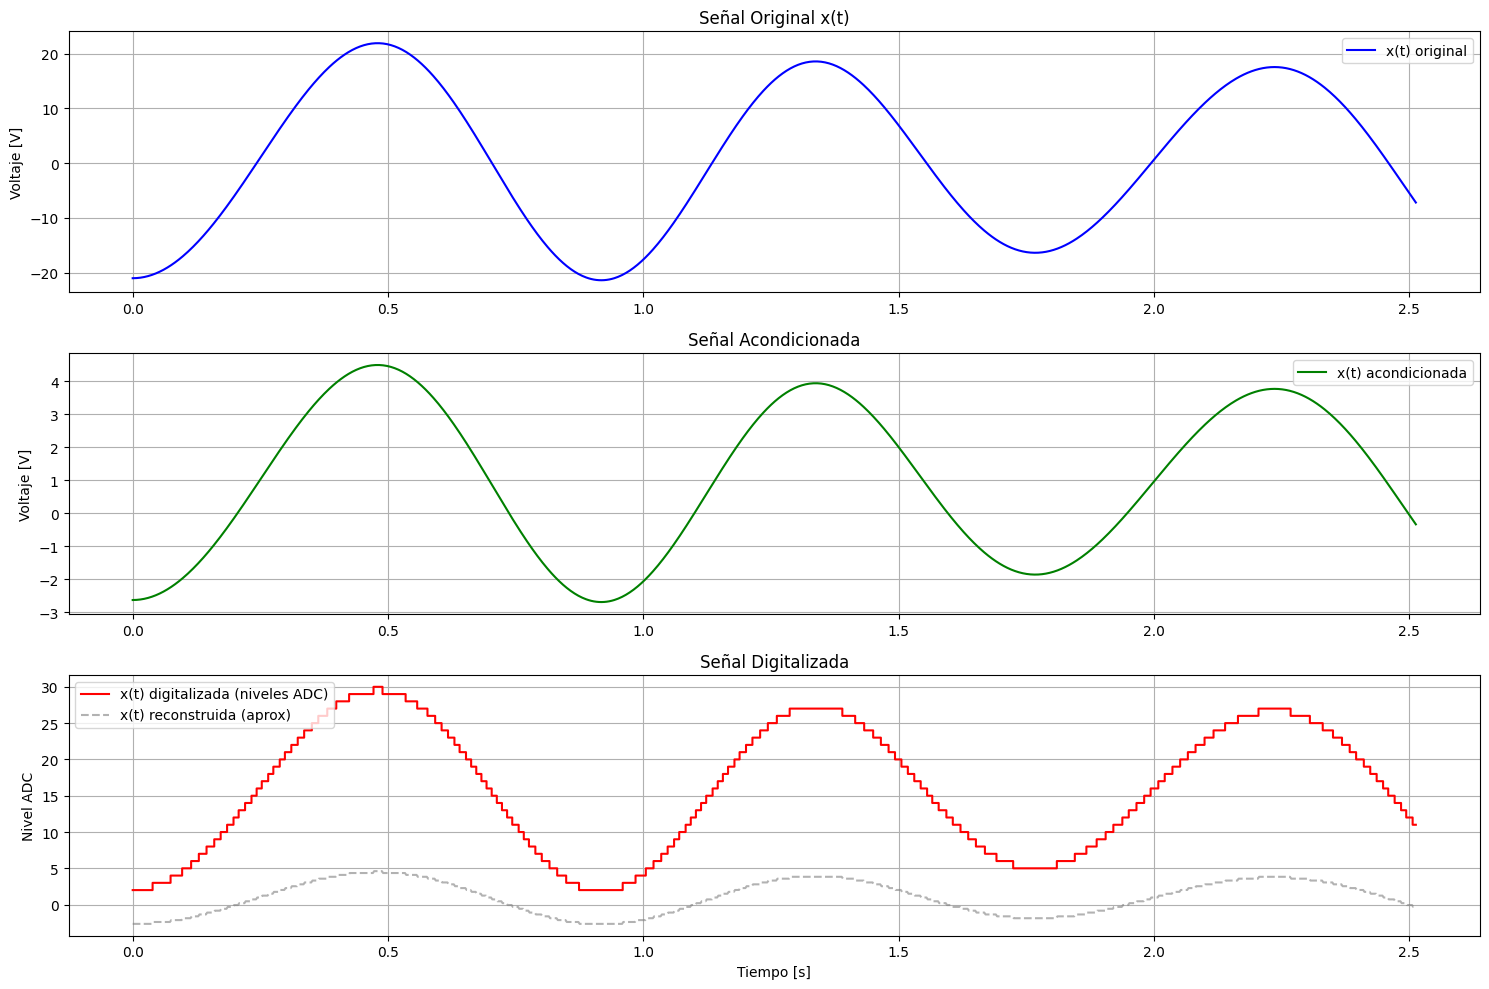

In [22]:
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np # Importa la librería numpy para operaciones matemáticas y arrays
import matplotlib.pyplot as plt # Importa la librería matplotlib para crear gráficas

# 1. Tiempo de simulación
# La frecuencia más baja es 5 rad/s => periodo T = 2π / 5
# Simulamos dos periodos
T = 2 * np.pi / 5 # Calcula el período de la señal con la frecuencia más baja
t = np.linspace(0, 2*T, 1000) # Crea un arreglo de tiempo desde 0 hasta dos períodos, con 1000 puntos. Esto define el eje horizontal de las gráficas.

# 2. Señal original
x = 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t) # Define la señal original como una suma de senos y cosenos. Es la señal de entrada que vamos a procesar.

# 3. Acondicionamiento
k = 8.3 / 50            # Escalamiento. Calcula un factor para ajustar la amplitud de la señal.
offset = 0.85           # Desplazamiento. Define un valor para mover la señal hacia arriba o abajo.
x_acond = k * x + offset # Aplica el escalamiento y el desplazamiento a la señal original. Esto la prepara para el siguiente paso.

# 4. Digitalización (ADC 5 bits, rango [-3.3, 5] V)
bits = 5 # Define el número de bits del conversor analógico-digital (ADC). A más bits, más precisión.
N_levels = 2 ** bits # Calcula el número total de niveles que puede representar el ADC (2 elevado al número de bits).
V_min, V_max = -3.3, 5 # Define el rango mínimo y máximo de voltaje que el ADC puede medir.
delta = (V_max - V_min) / N_levels # Calcula el tamaño de cada 'escalón' o nivel del ADC.

# Convertir señal acondicionada a niveles digitales
x_digital = np.floor((x_acond - V_min) / delta) # Convierte la señal acondicionada a un valor entero que representa el nivel digital. Resta el mínimo, divide por el tamaño del escalón y redondea hacia abajo.
x_digital = np.clip(x_digital, 0, N_levels - 1)  # Limitar entre 0 y 31. Asegura que los niveles digitales estén dentro del rango permitido por el número de bits.

# Reconstrucción aproximada a voltaje para visualizar
x_rec = x_digital * delta + V_min + delta / 2 # Aproxima la señal digital de vuelta a un voltaje para poder graficarla junto a las otras. Le suma la mitad del escalón para centrarla.

# 5. Gráficas
plt.figure(figsize=(15, 10)) # Crea una figura para mostrar las gráficas, definiendo su tamaño.

# Señal original
plt.subplot(3, 1, 1) # Crea la primera gráfica (fila 1 de 3, columna 1 de 1).
plt.plot(t, x, label='x(t) original', color='blue') # Dibuja la señal original en función del tiempo.
plt.title('Señal Original x(t)') # Pone un título a la gráfica.
plt.ylabel('Voltaje [V]') # Etiqueta el eje vertical.
plt.grid() # Muestra una cuadrícula en la gráfica.
plt.legend() # Muestra la leyenda con el nombre de la señal.

# Señal acondicionada
plt.subplot(3, 1, 2) # Crea la segunda gráfica (fila 2 de 3, columna 1 de 1).
plt.plot(t, x_acond, label='x(t) acondicionada', color='green') # Dibuja la señal acondicionada.
plt.title('Señal Acondicionada') # Pone un título a la gráfica.
plt.ylabel('Voltaje [V]') # Etiqueta el eje vertical.
plt.grid() # Muestra una cuadrícula.
plt.legend() # Muestra la leyenda.

# Señal digitalizada
plt.subplot(3, 1, 3) # Crea la tercera gráfica (fila 3 de 3, columna 1 de 1).
plt.step(t, x_digital, label='x(t) digitalizada (niveles ADC)', where='mid', color='red') # Dibuja la señal digitalizada como escalones.
plt.plot(t, x_rec, '--', label='x(t) reconstruida (aprox)', color='gray', alpha=0.6) # Dibuja la señal reconstruida de forma punteada para compararla.
plt.title('Señal Digitalizada') # Pone un título a la gráfica.
plt.ylabel('Nivel ADC') # Etiqueta el eje vertical.
plt.xlabel('Tiempo [s]') # Etiqueta el eje horizontal.
plt.grid() # Muestra una cuadrícula.
plt.legend() # Muestra la leyenda.

plt.tight_layout() # Ajusta automáticamente el espacio entre las gráficas para que no se superpongan.
plt.show() # Muestra todas las gráficas creadas.

Pregunta 2

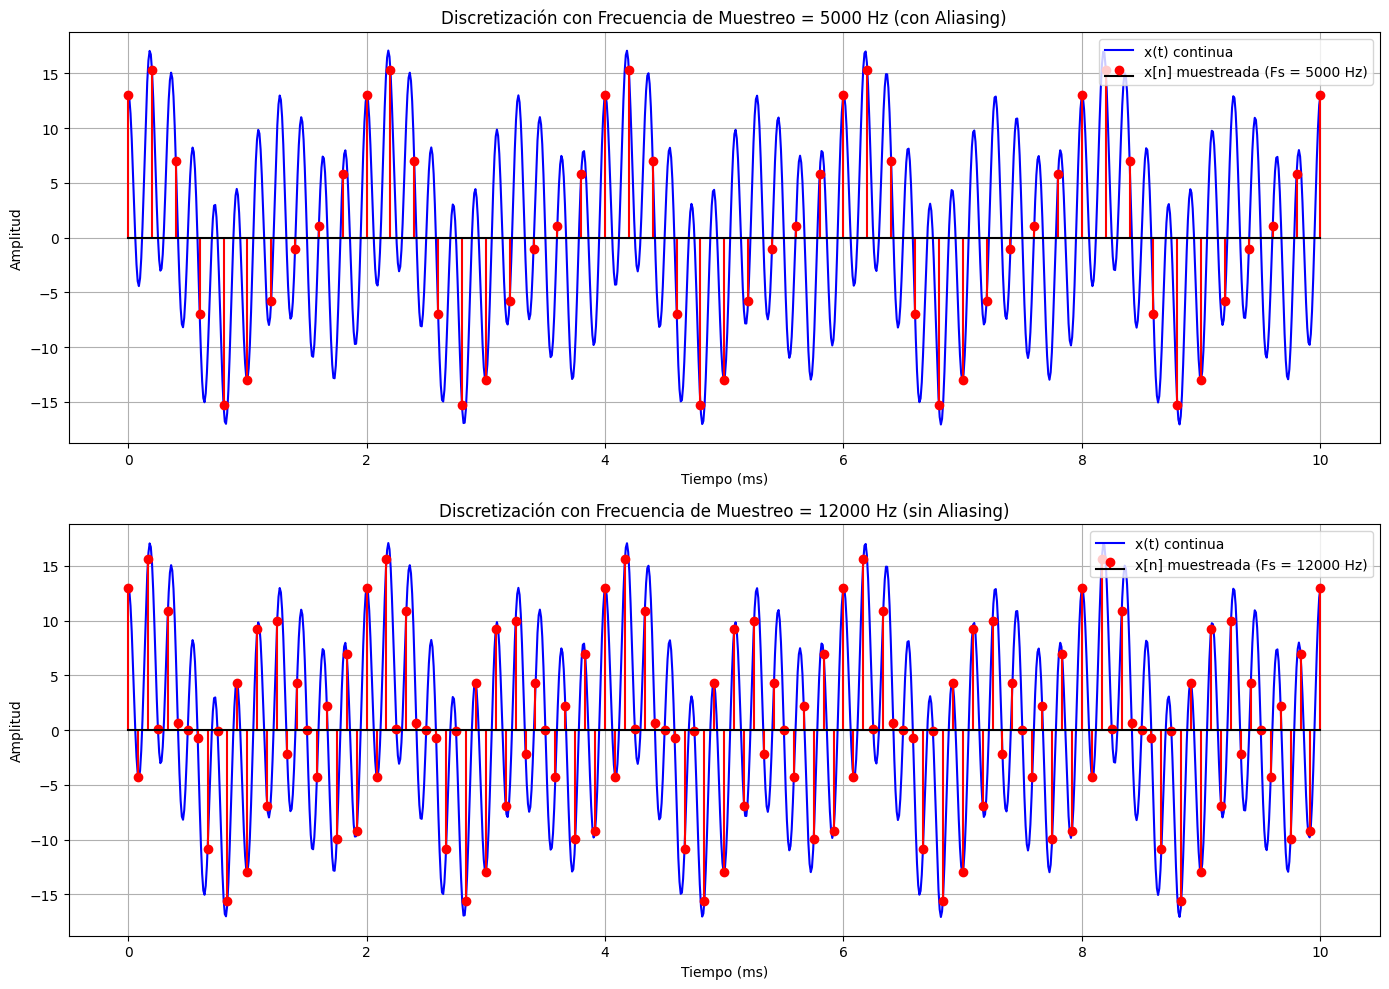

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# --- Código Original (con posible aliasing) ---

# 1. Parámetros - Original
fs_original = 5000  # Frecuencia de muestreo (Hz) - Original
Ts_original = 1/fs_original  # Período de muestreo - Original
duration_original = 0.01 # Duración total de la simulación en segundos
n_samples_original = int(duration_original / Ts_original) + 1 # Calcular el número de muestras
n_original = np.arange(0, n_samples_original)  # Muestras para señal discreta - Original

# Tiempo continuo para graficar (lo mantenemos para comparar)
t_cont_original = np.linspace(0, duration_original, 1000)

# 2. Señal continua x(t) - Original
x_t_original = 3 * np.cos(1000*np.pi*t_cont_original) + \
               5 * np.sin(2000*np.pi*t_cont_original) + \
               10 * np.cos(11000*np.pi*t_cont_original)

# 3. Señal discreta x[n] = x(nT) - Original
t_disc_original = n_original * Ts_original
x_n_original = 3 * np.cos(1000*np.pi*t_disc_original) + \
               5 * np.sin(2000*np.pi*t_disc_original) + \
               10 * np.cos(11000*np.pi*t_disc_original)


# --- Código Corregido (sin aliasing) ---

# 1. Parámetros - Corregido
# Aumentamos la frecuencia de muestreo para cumplir con el criterio de Nyquist
fs_corrected = 12000  # Nueva Frecuencia de muestreo (Hz) - Corregido
Ts_corrected = 1/fs_corrected  # Período de muestreo - Corregido

# Ajustamos el número de muestras para mantener una duración similar
duration_corrected = 0.01 # Duración total de la simulación en segundos
n_samples_corrected = int(duration_corrected / Ts_corrected) + 1 # Calcular el número de muestras
n_corrected = np.arange(0, n_samples_corrected)  # Muestras para señal discreta - Corregido

# Tiempo continuo para graficar (lo mantenemos para comparar)
t_cont_corrected = np.linspace(0, duration_corrected, 1000)

# 2. Señal continua x(t) - Corregido (Es la misma señal original)
x_t_corrected = 3 * np.cos(1000*np.pi*t_cont_corrected) + \
                5 * np.sin(2000*np.pi*t_cont_corrected) + \
                10 * np.cos(11000*np.pi*t_cont_corrected)

# 3. Señal discreta x[n] = x(nT) - Corregido
t_disc_corrected = n_corrected * Ts_corrected
x_n_corrected = 3 * np.cos(1000*np.pi*t_disc_corrected) + \
                5 * np.sin(2000*np.pi*t_disc_corrected) + \
                10 * np.cos(11000*np.pi*t_disc_corrected)


# --- Graficar Ambas Simulaciones ---

plt.figure(figsize=(14, 10)) # Figura más grande para dos subplots

# Gráfica con Muestreo a 5000 Hz (con aliasing)
plt.subplot(2, 1, 1) # Primer subplot (2 filas, 1 columna, posición 1)
plt.plot(t_cont_original * 1000, x_t_original, label="x(t) continua", color='blue')
plt.stem(t_disc_original * 1000, x_n_original, linefmt='r-', markerfmt='ro', basefmt='k-', label=f"x[n] muestreada (Fs = {fs_original} Hz)")
plt.title(f"Discretización con Frecuencia de Muestreo = {fs_original} Hz (con Aliasing)")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

# Gráfica con Muestreo a 12000 Hz (sin aliasing)
plt.subplot(2, 1, 2) # Segundo subplot (2 filas, 1 columna, posición 2)
plt.plot(t_cont_corrected * 1000, x_t_corrected, label="x(t) continua", color='blue')
plt.stem(t_disc_corrected * 1000, x_n_corrected, linefmt='r-', markerfmt='ro', basefmt='k-', label=f"x[n] muestreada (Fs = {fs_corrected} Hz)")
plt.title(f"Discretización con Frecuencia de Muestreo = {fs_corrected} Hz (sin Aliasing)")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.tight_layout() # Ajusta automáticamente el espacio entre subplots
plt.show()

Pregunta 3

In [24]:
import sympy as sp  # Se importa la librería sympy para hacer álgebra simbólica (variables, integrales, etc.)

# Definición de variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)  # Se definen t (tiempo), T (periodo), y A (amplitud) como variables reales y positivas
w0 = 2 * sp.pi / T  # Se define la frecuencia angular fundamental w0 = 2π/T

# Señal x1(t) con amplitud A
x1 = A * sp.cos(w0 * t)  # Se define x1(t) como una señal cosenoidal de amplitud A

# Definición por partes de x2(t)
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),            # x2(t) vale 1 entre 0 y T/4
    (-1, (t >= T/4) & (t < 3*T/4)),       # x2(t) vale -1 entre T/4 y 3T/4
    (1, (t >= 3*T/4) & (t < T))           # x2(t) vuelve a valer 1 entre 3T/4 y T
)

# Diferencia al cuadrado: |x1(t) - x2(t)|^2
f = (x1 - x2)**2  # Se calcula el error cuadrático entre las dos señales: (x1(t) - x2(t))^2

# Cálculo de la integral por tramos
integral = (
    sp.integrate((A * sp.cos(w0*t) - 1)**2, (t, 0, T/4)) +         # Se integra el error en el primer tramo (x2 = 1)
    sp.integrate((A * sp.cos(w0*t) + 1)**2, (t, T/4, 3*T/4)) +     # Se integra el error en el segundo tramo (x2 = -1)
    sp.integrate((A * sp.cos(w0*t) - 1)**2, (t, 3*T/4, T))         # Se integra el error en el tercer tramo (x2 = 1)
)

# Normalización por el periodo
distancia_media = integral / T  # Se divide la integral entre el periodo T para obtener el error cuadrático medio (distancia promedio)

# Simplificación del resultado
distancia_media_simplificada = sp.simplify(distancia_media)  # Se simplifica la expresión para que quede más limpia

# Mostrar resultado
distancia_media_simplificada  # Se muestra el resultado final ya simplificado



A**2/2 - 4*A/pi + 1

In [25]:
import numpy as np  # Se importa NumPy para trabajar con arreglos y cálculos numéricos
import matplotlib.pyplot as plt  # Se importa Matplotlib para graficar
from ipywidgets import interact  # Se importa interact para crear una interfaz interactiva
import warnings
warnings.filterwarnings("ignore")  # Se ignoran las advertencias para no saturar la salida

# Se definen los parámetros de la señal original
T = 10        # Periodo
A = 2         # Amplitud
d1 = 1        # Límite del tramo constante (valor absoluto)
d2 = 3        # Límite exterior del tramo lineal (valor absoluto)
w0 = 2 * np.pi / T  # Frecuencia angular fundamental: w0 = 2π / T

# Se define el vector de tiempo
num_points = 2000  # Número de puntos para la simulación
t = np.linspace(-T/2, T/2, num_points)  # Se crea un vector de tiempo centrado en 0
dt = t[1] - t[0]  # Se calcula el paso de tiempo entre muestras

# Se construye la señal x(t) por tramos
x = np.zeros_like(t)  # Se inicializa el arreglo x(t) en ceros
for i in range(num_points):
    if -T/2 <= t[i] < -d2:
        x[i] = 0  # x(t) es cero fuera del soporte [-d2, d2]
    elif -d2 <= t[i] <= -d1:
        x[i] = (-A / (d2 - d1)) * (t[i] + d2)  # Tramo decreciente lineal entre -d2 y -d1
    elif -d1 < t[i] < d1:
        x[i] = -A  # Tramo constante con valor -A entre -d1 y d1
    elif d1 <= t[i] <= d2:
        x[i] = (A / (d2 - d1)) * (t[i] - d2)  # Tramo creciente lineal entre d1 y d2
    elif d2 < t[i] <= T/2:
        x[i] = 0  # x(t) es cero fuera del soporte [-d2, d2]

# Se calcula la segunda derivada numérica de x(t)
x2p = np.gradient(np.gradient(x, dt), dt)  # Se usa la función de gradiente para derivar dos veces

# Se define una función que reconstruye la señal usando la Serie de Fourier hasta el armónico Na
def pltest(Na):
    # Se inicializan los coeficientes an y bn
    an = np.zeros(Na + 1)
    bn = np.zeros(Na + 1)

    # Se calcula el coeficiente a0 (término promedio de la serie)
    a0 = (2 / T) * np.trapz(x, t)

    # Se calculan los coeficientes an y bn usando la segunda derivada de x(t)
    for n in range(1, Na + 1):
        an[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.cos(n * w0 * t), t)
        bn[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.sin(n * w0 * t), t)

    # Se reconstruye la señal sumando los armónicos
    x_recon = np.full_like(t, a0 / 2)  # Se inicia con el término constante a0/2
    for n in range(1, Na + 1):
        x_recon += an[n] * np.cos(n * w0 * t) + bn[n] * np.sin(n * w0 * t)

    # Se calcula el error relativo entre la señal original y la reconstruida
    error_rel = np.linalg.norm(x - x_recon) / np.linalg.norm(x)
    print(f"Error relativo de reconstrucción (n=±{Na}): {error_rel:.6f}")

    # Se construyen los coeficientes complejos C_n
    n_vals_spectrum = np.arange(-Na, Na + 1)  # Se definen los índices n = -Na, ..., Na
    C_n_spectrum = np.zeros(len(n_vals_spectrum), dtype=complex)  # Se crea el arreglo para C_n

    for i, n in enumerate(n_vals_spectrum):
        if n == 0:
            C_n_spectrum[i] = a0 / 2  # El coeficiente C_0 es a0/2
        elif n > 0:
            C_n_spectrum[i] = (an[n] - 1j * bn[n]) / 2  # Fórmula para n positivo
        elif n < 0:
            C_n_spectrum[i] = (an[-n] + 1j * bn[-n]) / 2  # Fórmula para n negativo

    # Se obtienen magnitudes, fases, partes reales e imaginarias de los coeficientes
    magnitudes = np.abs(C_n_spectrum)
    fases = np.angle(C_n_spectrum)
    parte_real = np.real(C_n_spectrum)
    parte_imaginaria = np.imag(C_n_spectrum)

    # Se grafica la señal original y la reconstruida
    plt.figure(figsize=(10, 4))
    plt.plot(t, x, label='x(t)', color='green')  # Señal original
    plt.plot(t, x_recon, '--', label='Reconstrucción', color='blue')  # Señal reconstruida
    plt.title(f"Reconstrucción de x(t) con N = {Na}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Se grafican los espectros de Fourier
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    axs[0, 0].stem(n_vals_spectrum, magnitudes, linefmt='green', markerfmt='o', basefmt=' ')
    axs[0, 0].set_title("Magnitud $|C_n|$")
    axs[0, 0].set_xlabel("n")
    axs[0, 0].set_ylabel("Magnitud")

    axs[0, 1].stem(n_vals_spectrum, fases, linefmt='purple', markerfmt='o', basefmt=' ')
    axs[0, 1].set_title("Fase $\\angle C_n$")
    axs[0, 1].set_xlabel("n")
    axs[0, 1].set_ylabel("Fase [rad]")

    axs[1, 0].stem(n_vals_spectrum, parte_real, linefmt='brown', markerfmt='o', basefmt=' ')
    axs[1, 0].set_title("Parte Real Re{$C_n$}")
    axs[1, 0].set_xlabel("n")
    axs[1, 0].set_ylabel("Re{$C_n$}")

    axs[1, 1].stem(n_vals_spectrum, parte_imaginaria, linefmt='cyan', markerfmt='o', basefmt=' ')
    axs[1, 1].set_title("Parte Imaginaria Im{$C_n$}")
    axs[1, 1].set_xlabel("n")
    axs[1, 1].set_ylabel("Im{$C_n$}")

    # Se activa la grilla en todos los subgráficos
    for ax in axs.flat:
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Se crea una interfaz interactiva para elegir el número de armónicos N (de 0 a 5)
interact(pltest, Na=(0, 5, 1))


interactive(children=(IntSlider(value=2, description='Na', max=5), Output()), _dom_classes=('widget-interact',…

<function __main__.pltest(Na)>

El código busca demostrar cómo una señal por tramos puede representarse eficazmente mediante su Serie de Fourier, estudiar su reconstrucción progresiva con armónicos y analizar el contenido espectral para entender mejor su comportamiento en el dominio del tiempo y la frecuencia.